# Weather Patterns Around the Equator 
---
## Observations

---
### Set Up

In [1]:
# Dependencies
import pandas as pd
import requests
from datetime import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import api_keys
import json
from pprint import pprint
from citipy import citipy
from pandas.io.json import json_normalize

In [75]:
# location for save file
now = datetime.now()
ymd = now.strftime("%Y-%m-%d")

savefile = "Output/" + ymd + "_WeatherSample.csv"
savefile

'Output/2018-09-28_WeatherSample.csv'

In [3]:
# Coordinate Limits
lat_range = (-90.0, 90.0)
lon_range = (-180.0, 180.0)

# Sample size variables
target_size = 500
land_pct = .29
pool = round(target_size / land_pct)

# Container for sample cities
city_list = []

# Url for API calls
f = "imperial"   
c = "metric"
k = "standard"
owm_url = (f"http://api.openweathermap.org/data/2.5/weather?appid={api_keys.owm}&units={f}&q=")

---
### ID Locations for Testing

In [4]:
def rand_cities(size):
    # Generate random numbers for lat/lon coords
    rand_lat = np.random.uniform(lat_range[0], lat_range[1], size=size)
    rand_lon = np.random.uniform(lon_range[0], lon_range[1], size=size)
    
    # Container for return values
    results = []
    
    # Get our sample of cities
    for i in np.arange(size):
    
        # Find the closest city to our coord pairs
        city = citipy.nearest_city(rand_lat[i], rand_lon[i]).city_name
    
        # Add to list if it's unique
        if city not in results:
            results.append(city)
            
    # Return the resulting find        
    return results

In [5]:
# Find at least 500 random unique cities to test on
while(len(city_list) < 500):
    city_list = rand_cities(pool)
    
# Check the size of our sample
city_count = len(city_list)
print(f"{city_count} unique cities out of {pool} random queries found!")

704 unique cities out of 1724 random queries found!


In [6]:
for i in city_list:
    print(i)

bauchi
saint george
pevek
bethel
baruun-urt
vizinga
vila franca do campo
khatanga
sao domingos do maranhao
cabra
ivanivka
andros town
thunder bay
cidreira
san patricio
bandarbeyla
leningradskiy
hamilton
zhigansk
tevaitoa
severo-kurilsk
taolanaro
sentyabrskiy
cagayan de tawi-tawi
lavrentiya
rikitea
saskylakh
nikolskoye
albany
jamestown
berlevag
castro
vicksburg
chihuahua
zhemchuzhnyy
bozoum
saint-leu
kapaa
mar del plata
eyrarbakki
faanui
montevideo
barrow
ushuaia
puerto del rosario
cape town
qaanaaq
mahebourg
jalu
nizhneyansk
marsaxlokk
amderma
tongren
shimanovsk
tasiilaq
tiksi
tadine
cordoba
east london
port alfred
jizan
samusu
nanortalik
hermanus
sorong
owando
gazimagusa
georgetown
thompson
carnarvon
talnakh
nizhniy odes
san carlos de bariloche
mayor pablo lagerenza
vaini
olinda
koumac
vestmannaeyjar
monrovia
tuktoyaktuk
gillette
qasigiannguit
butaritari
tumannyy
taoudenni
saldanha
punta arenas
comodoro rivadavia
westport
mataura
anshun
barbar
joshimath
faya
saint-philippe
solnechnyy


---
### Check Weather for Locations

In [18]:
response = requests.get(owm_url+city_list[0])

In [28]:

print(response.status_code==200)

True


In [9]:
weather = response.json()
pprint(weather)

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 10.31, 'lon': 9.85},
 'dt': 1538167975,
 'id': 2347470,
 'main': {'grnd_level': 951.06,
          'humidity': 83,
          'pressure': 951.06,
          'sea_level': 1024.64,
          'temp': 72.82,
          'temp_max': 72.82,
          'temp_min': 72.82},
 'name': 'Bauchi',
 'sys': {'country': 'NG',
         'message': 0.0051,
         'sunrise': 1538111363,
         'sunset': 1538154747},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 152.502, 'speed': 3.6}}


In [10]:
df_test = pd.DataFrame(json_normalize(weather))
df_test

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,main.temp_max,main.temp_min,name,sys.country,sys.message,sys.sunrise,sys.sunset,weather,wind.deg,wind.speed
0,stations,80,200,10.31,9.85,1538167975,2347470,951.06,83,951.06,...,72.82,72.82,Bauchi,NG,0.0051,1538111363,1538154747,"[{'id': 803, 'main': 'Clouds', 'description': ...",152.502,3.6


In [11]:
# Counter that prints a "right-aligned" result of uniform spaces
def status_frmct(position, size):
    diff = len(str(size)) - len(str(position))
    result = ""
    
    for i in np.arange(diff):
        result += " "
    
    return result + (f"{position}/{size}")

In [12]:
# Prints the last "number" of messages in an array
def print_last(queue, number):
    last = len(queue)
    for i in np.arange(last-number, last):
        print(queue[i])
    return

In [31]:
# Returns spacers for aligning print
def pretty_sp(longest, current):
    result = ""
    diff = len(longest) - len(current)
    for i in np.arange(diff):
        result += " "

    return result

In [29]:
# Log the status of the API calls
separator = "--------------------------------------------------"
api_call_log = ["Attempting to Retrieve data...", separator]
print_last(api_call_log, 2)

# Variables for helping with tracking/containing call results
attempt = 1
found = 0
weather_list = []
longest_city_name = max(city_list, key=len)

# Run an API call for each city in our sample
for city in city_list:
    status = (f"Attempt on call {status_frmct(attempt,city_count)}: {city.title()} {pretty_sp(longest_city_name, city)}>>>   ")
    response = requests.get(owm_url + city)
    
    if (response.status_code == 200):
        found += 1
        status += "Success."
        weather_list.append(response.json())
    else:
        status += (f"Error {response.status_code}!")
    
    # Print a status update for each city
    api_call_log.append(status)
    print(status)
    
    # Create a delay so that the max number of openweathermap api calls is not exceeded (60/min)
    if((attempt%60) == 0):
        api_call_log.append(separator)
        api_call_log.append("Maximum number of calls per minute in OpenWeatherMap.org made.  Waiting for cooldown.")
        api_call_log.append(separator)
        print_last(api_call_log, 3)
        time.sleep(60)
        
    attempt += 1

api_call_log.append(separator)
api_call_log.append(f"Calls completed! Found {found} out of {city_count} records.")
print_last(api_call_log, 2)

Attempting to Retrieve data...
--------------------------------------------------
Attempt on call   1/704: Bauchi   >>>   Success.
Attempt on call   2/704: Saint George   >>>   Success.
Attempt on call   3/704: Pevek   >>>   Success.
Attempt on call   4/704: Bethel   >>>   Success.
Attempt on call   5/704: Baruun-Urt   >>>   Success.
Attempt on call   6/704: Vizinga   >>>   Success.
Attempt on call   7/704: Vila Franca Do Campo   >>>   Success.
Attempt on call   8/704: Khatanga   >>>   Success.
Attempt on call   9/704: Sao Domingos Do Maranhao   >>>   Success.
Attempt on call  10/704: Cabra   >>>   Success.
Attempt on call  11/704: Ivanivka   >>>   Success.
Attempt on call  12/704: Andros Town   >>>   Success.
Attempt on call  13/704: Thunder Bay   >>>   Success.
Attempt on call  14/704: Cidreira   >>>   Success.
Attempt on call  15/704: San Patricio   >>>   Success.
Attempt on call  16/704: Bandarbeyla   >>>   Success.
Attempt on call  17/704: Leningradskiy   >>>   Success.
Attempt on

Attempt on call 149/704: Dikson   >>>   Success.
Attempt on call 150/704: Hobart   >>>   Success.
Attempt on call 151/704: Kampene   >>>   Success.
Attempt on call 152/704: Gigmoto   >>>   Success.
Attempt on call 153/704: Daram   >>>   Success.
Attempt on call 154/704: Puerto Ayora   >>>   Success.
Attempt on call 155/704: Egvekinot   >>>   Success.
Attempt on call 156/704: Bukene   >>>   Success.
Attempt on call 157/704: Millinocket   >>>   Success.
Attempt on call 158/704: Kaitangata   >>>   Success.
Attempt on call 159/704: La Ronge   >>>   Success.
Attempt on call 160/704: Kenai   >>>   Success.
Attempt on call 161/704: Tongchuan   >>>   Success.
Attempt on call 162/704: Lebu   >>>   Success.
Attempt on call 163/704: Paamiut   >>>   Success.
Attempt on call 164/704: Cherskiy   >>>   Success.
Attempt on call 165/704: Sao Filipe   >>>   Success.
Attempt on call 166/704: Richards Bay   >>>   Success.
Attempt on call 167/704: Tabarqah   >>>   Error 404!
Attempt on call 168/704: Saleau

Attempt on call 301/704: Saint-Joseph   >>>   Success.
Attempt on call 302/704: Hithadhoo   >>>   Success.
Attempt on call 303/704: Wanning   >>>   Success.
Attempt on call 304/704: Constitucion   >>>   Success.
Attempt on call 305/704: Kornwestheim   >>>   Success.
Attempt on call 306/704: Kalmunai   >>>   Success.
Attempt on call 307/704: Ossora   >>>   Success.
Attempt on call 308/704: Muzaffarabad   >>>   Success.
Attempt on call 309/704: Livingstone   >>>   Success.
Attempt on call 310/704: Viligili   >>>   Error 404!
Attempt on call 311/704: Batasan   >>>   Success.
Attempt on call 312/704: Inongo   >>>   Success.
Attempt on call 313/704: Marrakesh   >>>   Success.
Attempt on call 314/704: Sao Miguel Do Araguaia   >>>   Success.
Attempt on call 315/704: Asyut   >>>   Success.
Attempt on call 316/704: Cukai   >>>   Success.
Attempt on call 317/704: Karaul   >>>   Error 404!
Attempt on call 318/704: Tabiauea   >>>   Error 404!
Attempt on call 319/704: Bereda   >>>   Success.
Attemp

Attempt on call 454/704: Kavaratti   >>>   Success.
Attempt on call 455/704: Nizhniy Ingash   >>>   Success.
Attempt on call 456/704: Port Hedland   >>>   Success.
Attempt on call 457/704: Forestville   >>>   Success.
Attempt on call 458/704: Port Macquarie   >>>   Success.
Attempt on call 459/704: Antofagasta   >>>   Success.
Attempt on call 460/704: Umm Kaddadah   >>>   Success.
Attempt on call 461/704: Terenos   >>>   Success.
Attempt on call 462/704: Sun City West   >>>   Success.
Attempt on call 463/704: Araouane   >>>   Success.
Attempt on call 464/704: Suntar   >>>   Success.
Attempt on call 465/704: Sorland   >>>   Success.
Attempt on call 466/704: Hunza   >>>   Error 404!
Attempt on call 467/704: Singaparna   >>>   Success.
Attempt on call 468/704: Maldonado   >>>   Success.
Attempt on call 469/704: Ternate   >>>   Success.
Attempt on call 470/704: Sur   >>>   Success.
Attempt on call 471/704: Sovetskiy   >>>   Success.
Attempt on call 472/704: Kostomuksha   >>>   Success.
Att

Attempt on call 604/704: The Valley   >>>   Success.
Attempt on call 605/704: Aklavik   >>>   Success.
Attempt on call 606/704: Otofuke   >>>   Success.
Attempt on call 607/704: Timmins   >>>   Success.
Attempt on call 608/704: Buin   >>>   Success.
Attempt on call 609/704: Svetlyy   >>>   Error 404!
Attempt on call 610/704: Kuche   >>>   Error 404!
Attempt on call 611/704: Kyzyl-Suu   >>>   Success.
Attempt on call 612/704: Paka   >>>   Success.
Attempt on call 613/704: Nouadhibou   >>>   Success.
Attempt on call 614/704: Geraldton   >>>   Success.
Attempt on call 615/704: Skibotn   >>>   Success.
Attempt on call 616/704: Pochutla   >>>   Success.
Attempt on call 617/704: Taburi   >>>   Error 404!
Attempt on call 618/704: Waddan   >>>   Success.
Attempt on call 619/704: Pradopolis   >>>   Success.
Attempt on call 620/704: Nemuro   >>>   Success.
Attempt on call 621/704: Villaviciosa   >>>   Success.
Attempt on call 622/704: Rantepao   >>>   Success.
Attempt on call 623/704: Baft   >>>

In [32]:
df_weather = pd.DataFrame(json_normalize(weather_list))
df_weather.head()

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.gust,wind.speed
0,stations,80,200,10.31,9.85,1538168594,2347470,951.06,83,951.06,...,NaN,0.0113,1538111363,1538154747,NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...",152.502,NaN,3.60
1,stations,75,200,39.45,22.34,1538164200,262462,NaN,63,1017.00,...,5674.0,0.0385,1538108669,1538151418,1.0,10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...",260.000,NaN,9.17
2,stations,68,200,69.70,170.27,1538168920,2122090,1024.25,92,1024.25,...,NaN,0.0028,1538073807,1538115206,NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...",118.002,NaN,9.08
3,stations,75,200,60.79,-161.76,1538164380,5880568,NaN,67,1013.00,...,28.0,0.0041,1538153319,1538195073,1.0,16093.0,"[{'id': 803, 'main': 'Clouds', 'description': ...",120.000,NaN,18.34
4,stations,76,200,46.68,113.28,1538168921,2032614,903.40,85,903.40,...,NaN,0.0039,1538086924,1538129511,NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...",267.002,NaN,12.77


---
### Clean Up Data and Save to File

In [34]:
df_weather.count()

base               628
clouds.all         628
cod                628
coord.lat          628
coord.lon          628
dt                 628
id                 628
main.grnd_level    348
main.humidity      628
main.pressure      628
main.sea_level     348
main.temp          628
main.temp_max      628
main.temp_min      628
name               628
rain.1h              3
rain.3h             76
sys.country        628
sys.id             280
sys.message        628
sys.sunrise        628
sys.sunset         628
sys.type           280
visibility         272
weather            628
wind.deg           614
wind.gust           16
wind.speed         628
dtype: int64

In [86]:
# Extract columns with complete data.
df_cleaned_weather = df_weather[['name', 'sys.country', 
                                 'coord.lat', 'coord.lon', 
                                 'dt', 
                                 'weather',
                                 'main.temp', 'main.temp_max', 'main.temp_min', 
                                 'clouds.all', 
                                 'wind.speed',
                                 'main.humidity', 'main.pressure', 
                                 'sys.sunrise', 'sys.sunset', 
                                ]]
# Adjust column names
df_cleaned_weather.columns = ["Name", "Country", "Latitude", "Longitude", "DT", "Weather", 
                              "Temperature", "Max. Temperature", "Min. Temperature",  
                              "Clouds", "Wind Speed", "Humidity", "Pressure", "Sunrise", "Sunset"
                             ]

# Save findings to csv
df_cleaned_weather.to_csv(savefile)

---
### Data Visualization
#### Latitude vs Temperature Plot

In [109]:
# Function for plotting owm dataframe data from cleanup
def owmdf_plt(xlbl, ylbl, units, cmap):
    # Extract lists for plotting
    xs = df_cleaned_weather[xlbl].tolist()
    ys = df_cleaned_weather[ylbl].tolist()
    
    # Define a color array for the cmap
    c = [(1-(i/100)) for i in ys]

    # Plot the data with a color map based on temperature out of 100
    plot = plt.scatter(xs, ys, c=c, cmap=cmap, edgecolor="black")

    # Clean up plot appearance
    plt.grid()
    name = (f"{xlbl} vs. {ylbl} of {city_count} cities on {ymd}")
    plot_title = plt.title(name)
    plot_ylbl = plt.ylabel(f"{ylbl} ({units})")
    plot_xlbl = plt.xlabel(f"{xlbl}")
    
    # Set save path
    saveto = (f"Output/{name}.png")
    
    # Save the plot image
    plt.savefig(saveto, bbox_inches="tight")
    
    return plot

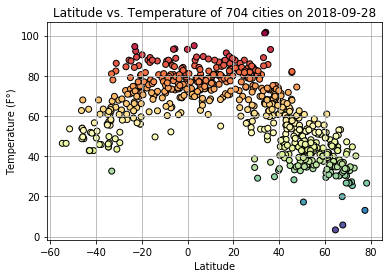

In [110]:
xlbl = "Latitude"
cmap = "Spectral"
units = "F°" 
lvt_plot = owmdf_plt(xlbl, "Temperature", units, cmap)

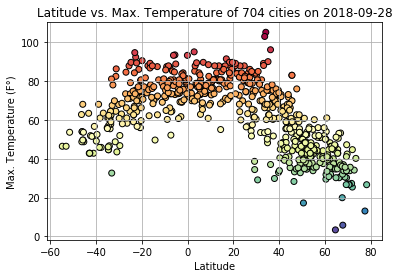

In [111]:
lvMaxT_plot = owmdf_plt(xlbl, "Max. Temperature", units, cmap)

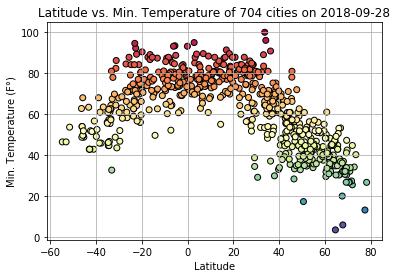

In [112]:
lvMinT_plot = owmdf_plt(xlbl, "Min. Temperature", units, cmap)

#### Latitude vs Humidity Plot

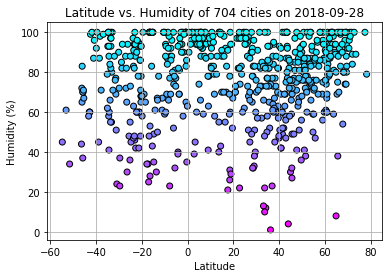

In [113]:
lvh_plot = owmdf_plt(xlbl, "Humidity", "%", "cool")

#### Latitude vs Cloudiness Plot

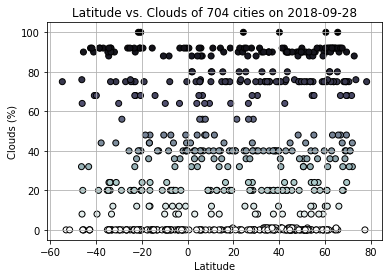

In [114]:
lvc_plot = owmdf_plt(xlbl, "Clouds", "%", "bone")

#### Latitude vs Windspeed Plot

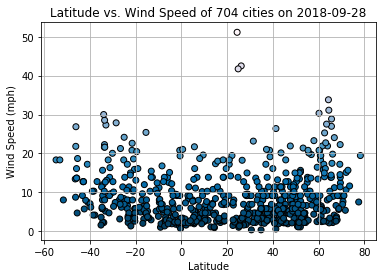

In [115]:
lvWS_plot = owmdf_plt(xlbl, "Wind Speed", "mph", "PuBu")